# Grade: /100 pts

# Assignment 7: Tree-based methods

In this assignment you'll study tree methods. You will use a dataset that contains the premier league matches of soccer between 2010 and 2021. The data has the following variables:

|#|Attribute|Description|
|---|---|---|
|0|home_team|home team|
|1|away_team|away team|
|2|result_full|match result|
|3|home_clearances|home team clearances in the match|
|4|home_corners|home team corners in the match|
|5|home_fouls_conceded|home team fouls conceded in the match|
|6|home_offsides|home team offsides in the match|
|7|home_passes|home team passes in the match|
|8|home_possession|home team possession in the match|
|9|home_red_cards|home team red cards in the match|
|10|home_shots|home team shots in the match|
|11|home_shots_on_target|home team shots on target in the match|
|12|home_tackles|home team tackles in the match|
|13|home_touches|home team touches in the match|
|14|home_yellow_cards|home team yellow cards in the match|
|15|away_clearances|away tem clearances in the match|
|16|away_corners|away team corners in the match|
|17|away_fouls_concedevd|away team fouls conceded in the match|
|18|away_offsides|away team offsides in the match|
|19|away_passes|away team passes in the match|
|20|away_possession|away team possession in the match|
|21|away_red_cards|away team red cards in the match|
|22|away_shots|away team shots in the match|
|23|away_shots_on_target|away team shots on target in the match|
|24|away_tackles|away team tackles in the match|
|25|away_touches|away team touches in the match|
|26|away_yellow_cards|away team yellow cards in the match|
|27|clearances_avg_home|average home team clearances in the season; accumulated until the last match|
|28|corners_avg_home|average home team corners in the season; accumulated until the last match|
|29|fouls_conceded_avg_home|average home team fouls conceded in the season; accumulated until the last match|
|30|offsides_avg_home|average home team offsides in the season; accumulated until the last match|
|31|passes_avg_home|average home team passes in the season; accumulated until the last match|
|32|possession_avg_home|average home team possession in the season; accumulated until the last match|
|33|red_cards_avg_home|average home team red cards in the season; accumulated until the last match|
|34|shots_on_target_avg_home|average home team shots on target in the season; accumulated until the last match|
|35|tackles_avg_home|average home team tackles in the season; accumulated until the last match|
|36|touches_avg_home|average home team touches in the season; accumulated until the last match|
|37|yellow_cards_avg_home|average home team yellow cards in the season; accumulated until the last match|
|38|goals_scored_ft_avg_home|average home team goals scored in the season; accumulated until the last match|
|39|goals_conced_ft_avg_home|average home team goals conceded in the season; accumulated until the last match|
|40|sg_match_ft_acum_home|goals difference in the season; accumulated until the last match|
|41|goals_scored_ht_avg_home|average home team goals scored in 1st time in the season; accumulated until the last match|
|42|goals_conced_ht_avg_home|average home team goals conceded in 1st time in the season; accumulated until the last match|
|43|clearances_avg_away|average away team clearances in the season; accumulated until the last match|
|44|corners_avg_away|average away team corners in the season; accumulated until the last match|
|45|fouls_conceded_avg_away|average away team fouls conceded in the season; accumulated until the last match|
|46|offsides_avg_away|average away team offsides in the season; accumulated until the last match|
|47|passes_avg_away|average away team passes in the season; accumulated until the last match|
|48|possession_avg_away|average away team possession in the season; accumulated until the last match|
|49|red_cards_avg_away|average away team red cards in the season; accumulated until the last match|
|50|shots_on_target_avg_away|average away team shots on target in the season; accumulated until the last match|
|51|tackles_avg_away|average away team tackles in the season; accumulated until the last match|
|52|touches_avg_away|average away team touches in the season; accumulated until the last match|
|53|yellow_cards_avg_away|average away team yellow cards in the season; accumulated until the last match|
|54|goals_scored_ft_avg_away|average away team goals scored in the season; accumulated until the last match|
|55|goals_conced_ft_avg_away|average away team goals conceded in the season; accumulated until the last match|
|56|sg_match_ft_acum_away|goals difference in the season; accumulated until the last match|
|57|goals_scored_ht_avg_away|average away team goals scored in 1st time in the season; accumulated until the last match|
|58|goals_conced_ht_avg_away|average away team goals conceded in 1st time in the season; accumulated until the last match|

We aim to predict the outcome of matches. "0" if the home team won, "1" if the away team won, and "2" if the teams finished in a draw.

*Do not forget to label axes in your figures.*

*Take advantage of the flag `n_jobs=-1` where applicable.*

**Points will be deducted if a variable has a different name than the one specified by the question, where applicable.**

### <span style="color:yellow"> Global Toolbox </span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn as sk
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

import pydotplus
from sklearn.tree import export_graphviz
from IPython.display import Image

import warnings

warnings.filterwarnings("ignore")
seed = 415
np.random.seed(seed)


### Q1.1 - <span style="color:red">[4]</span> - Load and clean the dataset:

1. Load the dataset.
2. Since we aim to predict the outcomes of matches, we cannot use the variables which were produced during the games such as passes, yellow/red cards etc. Please drop all the variables that you would not have known prior to the match, except for the goals.
3. Store the shape of the dataframe in a variable called <span style="color:pink">**shape_vector**</span> and `print` it.

In [2]:
df = pd.read_csv("PL_matches.csv")
df = df.drop(df.columns[3:27], axis=1)
shape_vector = df.shape
print(shape_vector)


(3957, 35)


### Q1.2 - <span style="color:red">[10]</span> - Create the target variable:

1. Create a new variable (column) in the dataset called "target", which will be the target for our classification task. The entires of this variable will be "0" if the home team scored more goals than away team, "1" if the away scored more, and "2" if they scored the same number of goals. To create the target variable you **must** make use of the methods `pandas.Series.str.split` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html)) and `pandas.DataFrame.apply` (documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html)).
2. Which matches had the greatest goal difference? `print` the name of the home team, the name of the away team, and the goal difference of the match. Example output: "The match between TeamA and TeamB with a goal difference of X".
3. Drop all variables related to the results of the games including the names of the teams, except for your target (i.e., extracted in Step 1).
4. **Written question:** Is this dataset balanced? Why? Write no more than 2 lines.

In [3]:
def assign_target(row):
    home_goals, away_goals = map(int, row["result_full"].split("-"))
    if home_goals > away_goals:
        return 0  # Home win
    elif home_goals < away_goals:
        return 1  # Away win
    else:
        return 2  # Draw


df["target"] = df.apply(assign_target, axis=1)

# Identifying matches with the greatest goal difference
df["goal_difference"] = df.apply(
    lambda x: abs(
        int(x["result_full"].split("-")[0]) - int(x["result_full"].split("-")[1])
    ),
    axis=1,
)
max_diff = df["goal_difference"].max()

matches_with_max_diff = df.loc[
    df["goal_difference"] == max_diff, ["home_team", "away_team", "goal_difference"]
]

print(matches_with_max_diff)

df = df.drop(["goal_difference", "result_full", "home_team", "away_team"], axis=1)

# count classes
df["target"].value_counts()


              home_team       away_team  goal_difference
3335        Southampton  Leicester City                9
3916  Manchester United     Southampton                9


target
0    1795
1    1189
2     973
Name: count, dtype: int64

**Written answer:**

Dataset is not balanced because the 'target' column has classes (home-win, away-win, and draw) that are imbalanced as home-team-win count is larger than away-team-win count and draw result is the smallest class. This could be related to how a home team has an advantage in competitive sports due to the home crowd and familiarity of playing at home.

### Q1.3 - <span style="color:red">[4]</span> - Correlation:

- Compute pairwise Pearson correlation coefficient (PCC) of the attributes and report only those with pairwise correlation absolute value greater than 0.7. The table below illustrates how the output of your code should look like. It is just for illustration and its number of rows is not real. (We are checking pairwise correlations amongst the variables - and not each variable with respect to target.)

|Row Index #|Variable Group 1|Variable Group 2|PCC|
|---|---|---|---|
|137|passes_avg_home|possession_avg_home|0.935083|
|...|...|...|...|
|...|...|...|...|

Caveat 1: The table must be sorted by PCC in descending order.

Caveat 2: Your table must not include duplicated correlation reports.

Caveat 3: Your table must not include any correlation reports involving the target.

- **Written question:** Using common sense and your understanding of the attributes, can you tell why are these variables correlated? Write no more than 5 sentences.

- Usually, we don’t want to include in the model highly correlated features (i.e., with pairwise Pearson correlation coefficient, for example, greater than 0.7 or below -0.7) because they give almost the same information (i.e., redundancy). The table you created is already listing those features for you. Drop those showing up under "Variable Group 2" from your dataframe (as keeping those under "Variable Group 1" should suffice).

In [4]:
# Compute the Pearson correlation matrix and exclude the 'target' variable
correlation_matrix = df.drop(columns=["target"]).corr()

# Create a mask to identify and exclude duplicate correlations and self-correlations
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Flatten the matrix and keep only correlations that are not duplicates, not self-correlations, and above the threshold
correlations = correlation_matrix.where(mask).stack().reset_index()
correlations.columns = ["Variable Group 1", "Variable Group 2", "PCC"]

# Filter out correlations below the absolute value threshold of 0.7
high_correlations = correlations[correlations["PCC"].abs() > 0.7]

# Sort by PCC in descending order
high_correlations_sorted = high_correlations.sort_values(
    by="PCC", ascending=False
).reset_index(drop=True)

# Display the final table
final_table = high_correlations_sorted[["Variable Group 1", "Variable Group 2", "PCC"]]

final_table


,Variable Group 1,Variable Group 2,PCC
0,passes_avg_home,touches_avg_home,0.990809
1,passes_avg_away,touches_avg_away,0.990702
2,possession_avg_home,touches_avg_home,0.950461
3,possession_avg_away,touches_avg_away,0.949458
4,passes_avg_home,possession_avg_home,0.935083
5,passes_avg_away,possession_avg_away,0.934452
6,goals_scored_ft_avg_away,goals_scored_ht_avg_away,0.802953
7,goals_scored_ft_avg_home,goals_scored_ht_avg_home,0.797851
8,shots_on_target_avg_away,goals_scored_ft_avg_away,0.782077
9,shots_on_target_avg_home,goals_scored_ft_avg_home,0.774993


**Written answer:**

Highly correlated variables often share a close relationship because they are influenced by similar factors or they directly influence each other. For example, in the context of soccer, passes_avg_home and possession_avg_home are correlated because a team that maintains possession of the ball more frequently is likely to complete more passes. This correlation indicates that both variables capture aspects of a team's control and strategy during a game. Inclusion of both in a predictive model might introduce redundancy, as they provide overlapping information about a team's performance. Removing or selecting one over the other can help in reducing the model's complexity and improving its interpretability and generalization to new data.


### Q2.1 - <span style="color:red">[35]</span> - Random Forest
- Separate the data into X and y, X should have the predictors and y the target

- Create train and test set with 30% of the data in the test set. Use the provided random seed.

- Instantiate three [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.get_params) each with a different method of selection for argument ```max_features```, *i.e.*, "sqrt", "log2", "None". Train them in a `for` loop with the number of trees in the range of 3 to 263 inclusive with step size of 20. Then, plot their OOB scores against number of trees in the forest for each classifier. Which selection method yields a better generalization score?

- Obtain the accuracy and the confusion matrix of the model with the best OOB rate. Store the accuracy in a variable called **accuracy1**.

- Use the provided `export_graphviz` (or any other tool) to visualize one arbitrary tree from one of the forests.

- **Written question:** Is this a good model? Write no more than 5 sentences.

**Use `random_state=seed` in all methods/functions accepting this argument.**

The best method is sqrt with an OOB score of 0.5258215962441315 and n_estimators=123
Accuracy: 0.5260942760942761
Confusion Matrix:
[[449  84   1]
 [194 176   1]
 [205  78   0]]


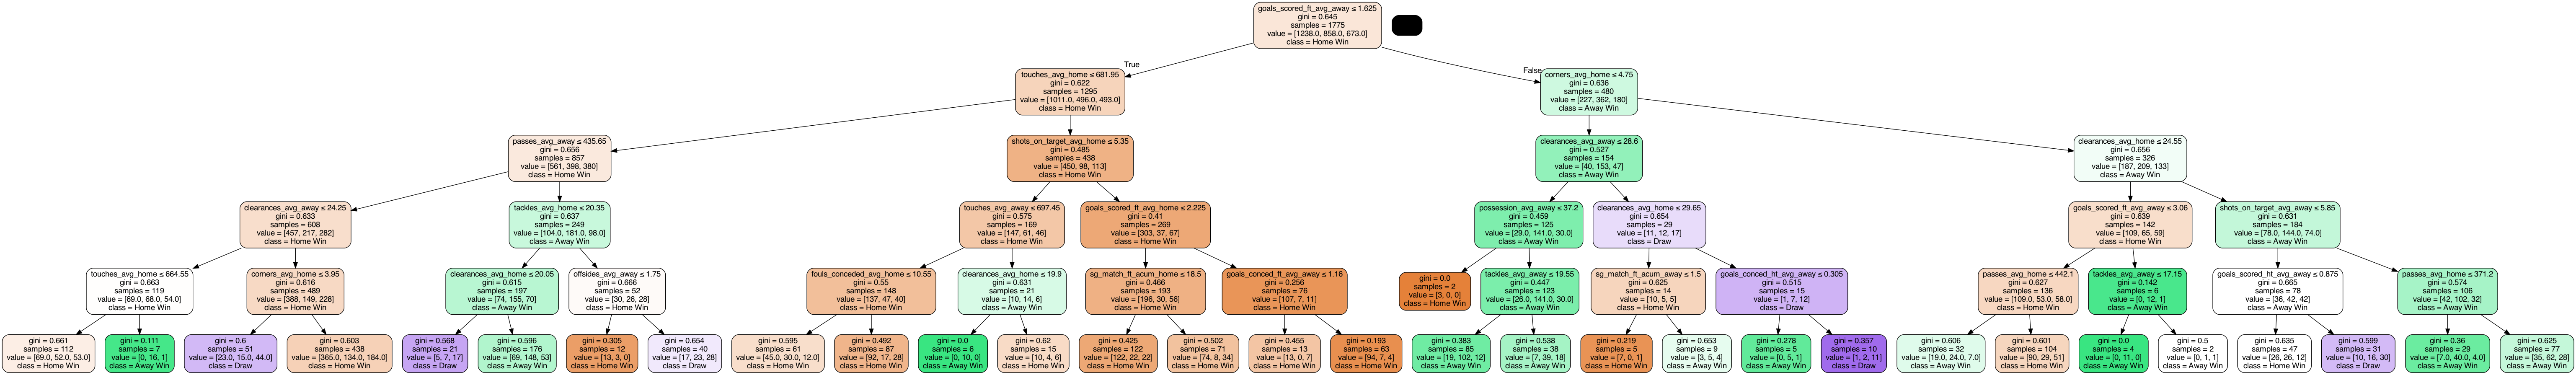

In [5]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("target", axis=1)
y = df["target"]

# Create train and test set with 30% in the test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=seed
)

# Instantiate Random Forest Classifier with different max_features
max_features_methods = ["sqrt", "log2", None]
n_estimators_range = range(3, 264, 20)

# Store OOB scores for each classifier
oob_scores = {method: [] for method in max_features_methods}
best_estimators = {method: (0, None) for method in max_features_methods}

# Train Random Forest classifiers
for max_features in max_features_methods:
    for n_estimators in n_estimators_range:
        clf = RandomForestClassifier(
            n_estimators=n_estimators,
            oob_score=True,
            max_features=max_features,
            max_depth=5,
            random_state=seed,
            n_jobs=-1,
        )
        clf.fit(X_train, y_train)
        # Check if OOB score is available
        if hasattr(clf, "oob_score_"):
            oob_score = clf.oob_score_
            oob_scores[max_features].append(oob_score)
            if oob_score > best_estimators[max_features][0]:
                best_estimators[max_features] = (oob_score, n_estimators)
        else:
            oob_scores[max_features].append(np.nan)

# Find the best OOB score and corresponding classifier
best_oob_score = 0
best_method = None
best_n_estimators = None
for max_features, (oob_score, n_estimators) in best_estimators.items():
    if oob_score > best_oob_score:
        best_oob_score = oob_score
        best_method = max_features
        best_n_estimators = n_estimators

# Print the best method and corresponding OOB score
print(
    f"The best method is {best_method} with an OOB score of {best_oob_score} and n_estimators={best_n_estimators}"
)

# Train the best classifier with the best number of trees
best_clf = RandomForestClassifier(
    n_estimators=best_n_estimators,
    oob_score=True,
    max_features=best_method,
    max_depth=5,
    random_state=seed,
    n_jobs=-1,
)
best_clf.fit(X_train, y_train)

# Predict on the test set and calculate the accuracy
y_pred = best_clf.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print accuracy and confusion matrix
print(f"Accuracy: {accuracy1}")
print(f"Confusion Matrix:\n{conf_matrix}")

# Visualize one arbitrary tree from the forest
tree = best_clf.estimators_[0]
dot_data = export_graphviz(
    tree,
    out_file=None,
    feature_names=X.columns,
    class_names=["Home Win", "Away Win", "Draw"],
    filled=True,
    rounded=True,
    special_characters=True,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


**Written answer:**

Considering the provided accuracy and confusion matrix, the model's performance is marginally better than random chance for a three-class prediction task, which suggests that it's not particularly strong. The confusion matrix indicates a bias towards predicting class 0, while class 2 predictions are notably lacking. This bias could be due to class imbalance, as indicated by the target class distribution, where class 0 is the most prevalent. Therefore, the model may not generalize well and would benefit from further tuning and possibly rebalancing the classes.


### Q2.2 - <span style="color:red">[15]</span> - Create a barplot reporting feature importance for the best model (found in Q2.1). For this purpose, instead of using mean decrease in impurity as the metric to calculate the importance scores, we want to use the permutation importance algorithm (check out the [documentation](https://scikit-learn.org/stable/modules/permutation_importance.html#permutation-importance)). Because, impurity-based feature importances can be misleading for high cardinality features (many unique values), but permutation feature importances do not have a bias toward high-cardinality features and can be computed on a left-out test set. The x-axis of your barplot should reflect the features' names and the y-axis their mean accuracy decrease. Each bar must also show its error bar. According to this barpot, what are the 3 most important features?

Use [`sklearn.inspection.permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) with `n_repeats=10` (because the computation for full permutation importance is very costly, so let's limit it).

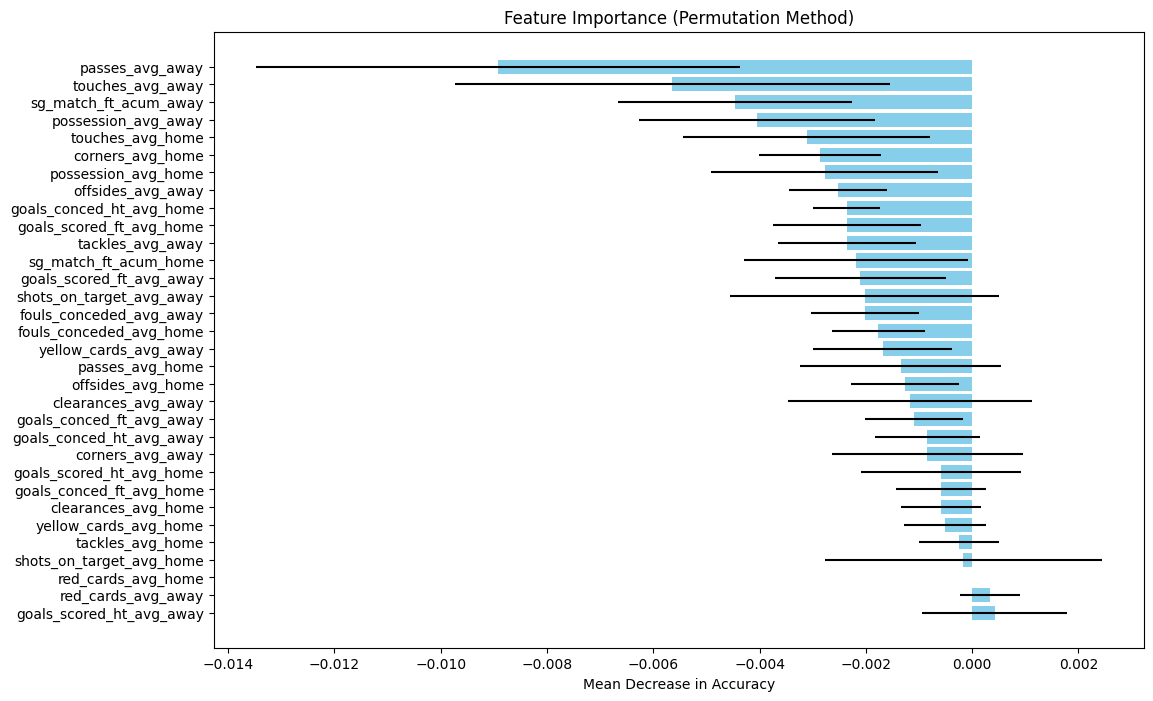

The three most important features are: ['passes_avg_away', 'touches_avg_away', 'sg_match_ft_acum_away']


In [6]:
from sklearn.inspection import permutation_importance

# Calculate permutation importance
perm_importance = permutation_importance(
    best_clf, X_test, y_test, n_repeats=10, random_state=seed, n_jobs=-1
)

# Sort the features by their importance scores
sorted_indices = perm_importance.importances_mean.argsort()

# Plotting
plt.figure(figsize=(12, 8))
plt.barh(
    range(len(sorted_indices)),
    perm_importance.importances_mean[sorted_indices],
    color="skyblue",
    align="center",
    xerr=perm_importance.importances_std[sorted_indices],
)
plt.xlabel("Mean Decrease in Accuracy")
plt.title("Feature Importance (Permutation Method)")
plt.yticks(range(len(sorted_indices)), X.columns[sorted_indices])
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()

# Print the names of the three most important features
most_important_features = X.columns[sorted_indices[:3]]
print("The three most important features are:", most_important_features.tolist())


**Written answer:**

The three most important features are passes_avg_away, touches_avg_away, sg_match_ft_acum_away.

This indicates the significance of away team actions in influencing the outcome of the model predictions. It seems that how the away team controls the ball and their overall match performance are key predictors in this model.


### Q3.1 - <span style="color:red">[20]</span> - XGBoosting
Now, we'll repeat the process for the XGB model, using an [```XGBClassifier``` object](https://xgboost.readthedocs.io/en/latest/python/python_api.html).

1. Use cross-validated grid search (with 5 stratified validation sets) to find the best values from the lists below for `XGBClassifier`. Use only 40% of the training set for your search, otherwise it will take a long time. Take advantage of `n_jobs=-1`. Report the optimal values found per argument.
 - Number of trees: [100, 150, 200]
 - Maximum depth: [8, 25, 42]
 - Learning rate: [0.1, 0.5, 0.9]

2. Train a `XGBClassifier` using the optimal values and report its accuracy as well as the confusion matrix. Store the accuracy in a variable called **accuracy2**.
3. Compare the confusion matrix and the accuracy of this model with the previous one. Is the performance of XGBoost better than the RandomForestClassifier?

**Use `random_state=seed` in all methods accepting this argument.**

In [7]:
from xgboost import XGBClassifier

# Using 40% of the training data for grid search
X_train_gs, _, y_train_gs, _ = train_test_split(
    X_train, y_train, test_size=0.6, random_state=seed
)

# Parameters grid for GridSearch
param_grid = {
    "n_estimators": [100, 150, 200],
    "max_depth": [8, 25, 42],
    "learning_rate": [0.1, 0.5, 0.9],
}

# Setup for 5 stratified folds
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

# Create a base XGBClassifier model
xgb = XGBClassifier(random_state=seed)

# Instantiate the grid search model
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=kfold,
    n_jobs=-1,
    verbose=1,
    scoring="accuracy",
)

# Fit the grid search to the data
grid_search.fit(X_train_gs, y_train_gs)

# Extract the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train a new XGBClassifier using the best parameters found
best_xgb = XGBClassifier(**best_params, random_state=seed)
best_xgb.fit(X_train, y_train)

# Predict on the test set and calculate the accuracy
y_pred = best_xgb.predict(X_test)
accuracy2 = accuracy_score(y_test, y_pred)
conf_matrix2 = confusion_matrix(y_test, y_pred)

print(f"Accuracy of the XGBClassifier: {accuracy2}")
print(f"Confusion Matrix of the XGBClassifier:\n{conf_matrix2}")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 150}
Accuracy of the XGBClassifier: 0.5033670033670034
Confusion Matrix of the XGBClassifier:
[[371 104  59]
 [131 187  53]
 [155  88  40]]


**Written answer:**

The optimal hyperparameters for the XGBoost model using cross-validated grid search are a learning rate of 0.1, maximum depth of 8, and 150 estimators. With these parameters, the XGBoost classifier achieved an accuracy of 50.34%, which is marginally lower than the previously evaluated RandomForestClassifier's accuracy. The confusion matrix shows a similar bias towards predicting the majority class, indicating potential class imbalance issues. Overall, the RandomForestClassifier slightly outperforms the XGBoost model on the given dataset.


### Q3.2 - <span style="color:red">[4]</span> - **Written question:** How could you potentially improve the accuracy of the models? Write no more than 5 sentences (no code).

**Written answer:**

To potentially improve the accuracy of the models, one could first address the class imbalance by using techniques like oversampling the minority class or under-sampling the majority class. Enhancing the feature selection process to include only the most relevant predictors and engineering new features that better capture the underlying patterns could also be beneficial. Hyperparameter tuning, possibly using more exhaustive methods such as randomized search or Bayesian optimization, could fine-tune the model's performance further. Additionally, ensemble methods that combine the predictions of several models might improve overall accuracy by leveraging their individual strengths. Lastly, more sophisticated data preprocessing, including scaling, normalization, or transformation of features, could lead to models learning more effectively.


### Q3.3 - <span style="color:red">[8]</span> - Create a barplot reporting permutation feature importances for your final XGB model. What are the top 3 most important features?

Use [`sklearn.inspection.permutation_importance`](https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html#sklearn.inspection.permutation_importance) with `n_repeats=10` (because the computation for full permutation importance is very costly, so let's limit it).

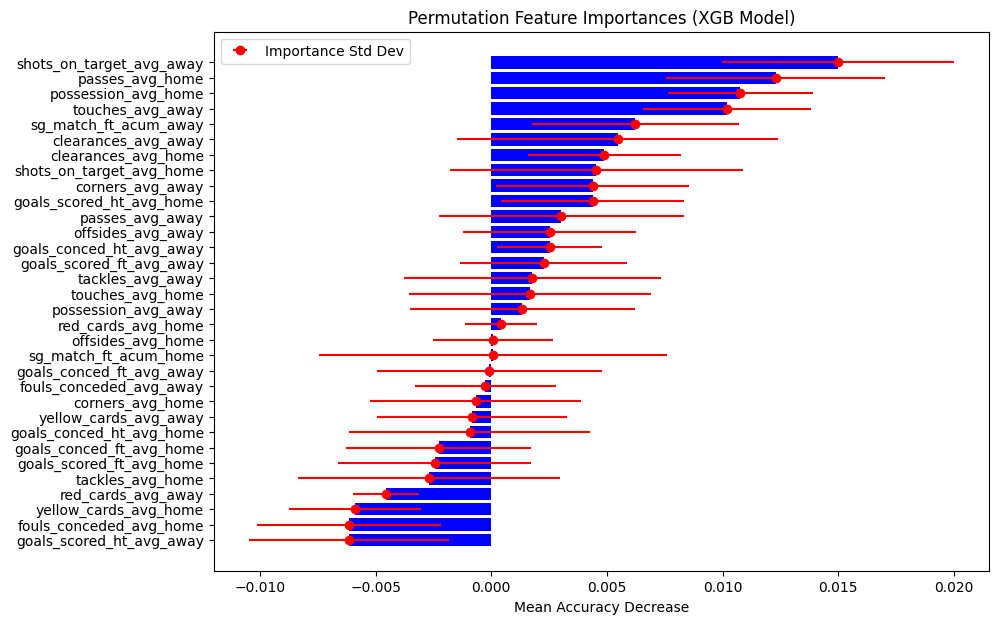

The top 3 most important features are: ['possession_avg_home', 'passes_avg_home', 'shots_on_target_avg_away']


In [8]:
# Compute permutation importance for the trained model on the test set
perm_importance = permutation_importance(
    best_xgb, X_test, y_test, n_repeats=10, random_state=seed, n_jobs=-1
)

# Get sorted indices of importances
sorted_idx = perm_importance.importances_mean.argsort()

# Plotting the feature importances
plt.figure(figsize=(10, 7))
plt.barh(
    range(len(sorted_idx)),
    perm_importance.importances_mean[sorted_idx],
    color="blue",
    align="center",
)
plt.errorbar(
    perm_importance.importances_mean[sorted_idx],
    range(len(sorted_idx)),
    xerr=perm_importance.importances_std[sorted_idx],
    fmt="o",
    color="red",
    label="Importance Std Dev",
)
plt.yticks(range(len(sorted_idx)), [X_test.columns[i] for i in sorted_idx])
plt.xlabel("Mean Accuracy Decrease")
plt.title("Permutation Feature Importances (XGB Model)")
plt.legend()
plt.show()

# Identify and print the top 3 most important features
top_3_features = [X_test.columns[i] for i in sorted_idx[-3:]]
print("The top 3 most important features are:", top_3_features)


**Written answer:**

The top 3 most important features are: possession_avg_home, passes_avg_home, shots_on_target_avg_away. These features had the highest mean decrease in accuracy when their values were randomly shuffled, which indicates that they are significant predictors within the XGBoost model.


$$The\;End$$